<a href="https://colab.research.google.com/github/Bgon01/Project_1_RetentionAnalysis/blob/main/Projects_1_Retention_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retention Study 

In [63]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving hr_data.csv to hr_data (1).csv


In [64]:
df = pd.read_csv("hr_data.csv")
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [66]:
# View categorical items
df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [67]:
# Display values in categorical columns
print(df['department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [68]:
len(df.columns)

9

In [69]:
df.shape

(14999, 9)

## Merging additional dataset

In [70]:
from google.colab import files
uploaded = files.upload()

Saving employee_satisfaction_evaluation.xlsx to employee_satisfaction_evaluation (1).xlsx


In [71]:
emp_satis_eval = pd.read_excel("employee_satisfaction_evaluation.xlsx")
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [72]:
emp_satis_eval.shape

(14999, 3)

In [73]:
main_df = df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [74]:
#Checking for nulls in the dataset
main_df[main_df.isnull().any(axis=1)].value_counts

<bound method DataFrame.value_counts of        employee_id  number_project  ...  satisfaction_level  last_evaluation
18            3794               2  ...                 NaN              NaN
19            1140               5  ...                 NaN             0.89
33            1230               2  ...                 NaN              NaN
53            1340               2  ...                 NaN              NaN
72           22316               2  ...                 NaN              NaN
92            1581               2  ...                 NaN              NaN
107          17376               2  ...                 NaN              NaN
120           1739               4  ...                 NaN              NaN
137           1847               2  ...                 NaN              NaN
175          32923               4  ...                 NaN              NaN
191           2160               4  ...                0.92              NaN
352           3150               4  

In [75]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [77]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [78]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [79]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [80]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [81]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [82]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

No handles with labels found to put in legend.


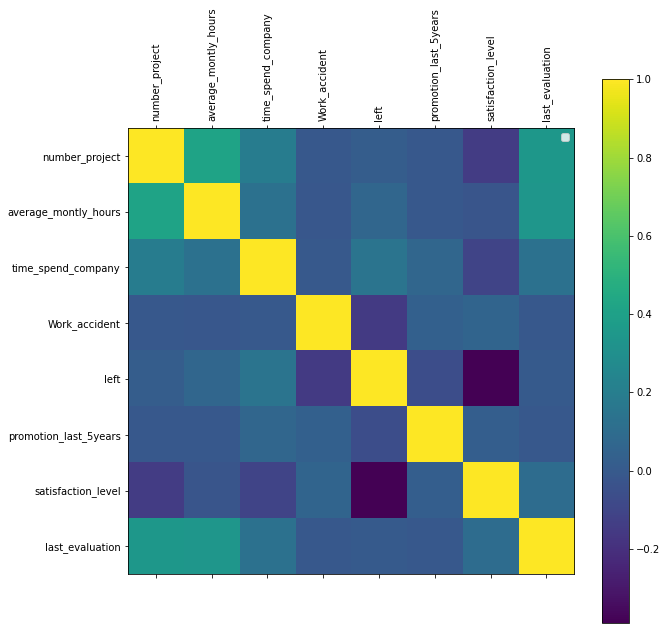

In [83]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

## Data Preparation for Machine Learning


In [84]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [85]:
len(main_df_final.columns)

19

In [86]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [87]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values

In [88]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

In [90]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.969073,0.956721,-1.030601,-0.406841,-0.148657,0.197218,0.088992,-0.237592,-0.231261,-0.226421,-0.2084,-0.246848,-0.259207,-0.616143,2.376793,-0.465522,-0.980474,1.153707
1,-1.462643,-0.822732,-0.342201,-0.406841,6.726894,-0.806866,-1.487632,-0.237592,-0.231261,-0.226421,-0.2084,-0.246848,-0.259207,1.623000,-0.420735,-0.465522,1.019914,-0.866771
2,0.158501,-0.802739,-0.342201,-0.406841,-0.148657,0.719341,-0.670123,-0.237592,-0.231261,-0.226421,-0.2084,-0.246848,-0.259207,-0.616143,-0.420735,2.148124,-0.980474,-0.866771
3,0.969073,0.876746,1.034601,-0.406841,-0.148657,0.007767,1.198469,-0.237592,-0.231261,-0.226421,-0.2084,-0.246848,-0.259207,1.623000,-0.420735,-0.465522,1.019914,-0.866771
4,0.158501,1.256629,-1.030601,-0.406841,-0.148657,-0.164252,1.432043,-0.237592,-0.231261,-0.226421,-0.2084,-0.246848,-0.259207,-0.616143,2.376793,-0.465522,1.019914,-0.866771


## Implementing a Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.58%
[[3189  245]
 [ 674  392]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3434
           1       0.62      0.37      0.46      1066

    accuracy                           0.80      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [92]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.9044027, 0.0955973]])

## Random Tree Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.02%
[[3428    6]
 [  38 1028]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3434
           1       0.99      0.96      0.98      1066

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [94]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [95]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.304839
0,0.188535
2,0.179996
1,0.158533
6,0.120528
3,0.011136
16,0.008926
17,0.004387
15,0.003925
13,0.003742


## Deep Learning

In [96]:
%tensorflow_version 2.x 

In [97]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [98]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.8206 - val_loss: 0.2861 - val_accuracy: 0.8927
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2353 - accuracy: 0.9240 - val_loss: 0.2008 - val_accuracy: 0.9378
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1889 - accuracy: 0.9431 - val_loss: 0.1773 - val_accuracy: 0.9460
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1756 - accuracy: 0.9469 - val_loss: 0.1674 - val_accuracy: 0.9516
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9497 - val_loss: 0.1631 - val_accuracy: 0.9533
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1671 - accuracy: 0.9509 - val_loss: 0.1615 - val_accuracy: 0.9544
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1656 - accuracy: 0.9507 - val_loss: 0.1605 - val_accuracy:

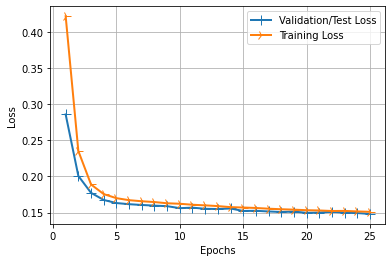

In [100]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

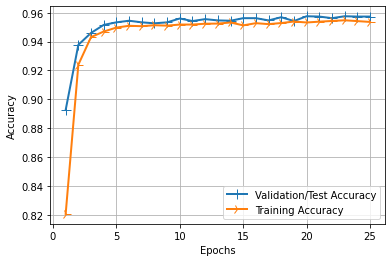

In [101]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [102]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3335   99]
 [  93  973]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3434
           1       0.91      0.91      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## Deeper Learning Model

In [103]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 270)               5130      
                                                                 
 dropout_3 (Dropout)         (None, 270)               0         
                                                                 
 dense_9 (Dense)             (None, 180)               48780     
                                                                 
 dropout_4 (Dropout)         (None, 180)               0         
                                                                 
 dense_10 (Dense)            (None, 90)                16290     
                                                                 
 dense_11 (Dense)            (None, 1)                 91        
                                                                 
Total params: 70,291
Trainable params: 70,291
Non-trai

In [104]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6541 - accuracy: 0.9048 - val_loss: 0.2769 - val_accuracy: 0.9460
Epoch 2/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2837 - accuracy: 0.9392 - val_loss: 0.2506 - val_accuracy: 0.9471
Epoch 3/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2662 - accuracy: 0.9378 - val_loss: 0.2342 - val_accuracy: 0.9529
Epoch 4/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.9423 - val_loss: 0.2272 - val_accuracy: 0.9531
Epoch 5/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2522 - accuracy: 0.9428 - val_loss: 0.2350 - val_accuracy: 0.9484
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2493 - accuracy: 0.9449 - val_loss: 0.2248 - val_accuracy: 0.9551
Epoch 7/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2444 - accuracy: 0.9427 - val_loss: 0.2183 - val_accuracy:

In [106]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3359   75]
 [ 111  955]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3434
           1       0.93      0.90      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

